# **CosmiCode-Internship**

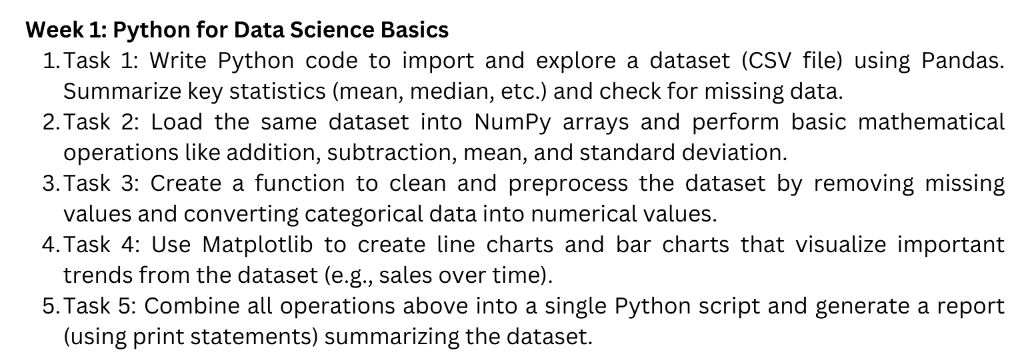

### Importing Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading Data

In [12]:
df = pd.read_csv('Datasets/House Price Prediction/Housing.csv')

# viewing the first 5 rows
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Task 1: Summarize the dataset and check for missing data

In [13]:
print(df.describe(), end="\n============================================================================\n")

# Check for missing data
print(df.isnull().sum())    # there are no missing values so we can move on


              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement

### Task 2: Convert the numerical columns to NumPy arrays and perform basic operations

In [14]:
## already loaded the dataset as a pandas dataframe so this is kinda useless but like, why not right?
price_array = np.array(df['price'])
area_array = np.array(df['area'])
bedrooms_array = np.array(df['bedrooms'])
bathrooms_array = np.array(df['bathrooms'])

# Performing basic mathematical operations 
print(f"The average for the prices column is {np.mean(price_array)}, so thats the average price for houses in this dataset")
print(f"The average for the area column is {np.mean(area_array)}, so thats the average area for houses in this dataset")
print(f"The standard deviation for the prices column is {np.std(price_array)}, so thats the standard deviation for houses in this dataset")
print(f"The standard deviation for the area column is {np.std(area_array)}, so thats the standard deviation for houses in this dataset")

The average for the prices column is 4766729.247706422, so thats the average price for houses in this dataset
The average for the area column is 5150.54128440367, so thats the average area for houses in this dataset
The standard deviation for the prices column is 1868722.8281312082, so thats the standard deviation for houses in this dataset
The standard deviation for the area column is 2168.149153321305, so thats the standard deviation for houses in this dataset


### Task 3: Clean and preprocess the dataset

In [15]:
# Convert categorical columns into numerical values
df_cleaned = df.copy()

# Convert 'yes'/'no' in binary columns into 1/0
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df_cleaned[binary_columns] = df_cleaned[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# Convert 'furnishingstatus' into numerical values: 'furnished' -> 2, 'semi-furnished' -> 1, 'unfurnished' -> 0
df_cleaned['furnishingstatus'] = df_cleaned['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

# Display the cleaned dataset
df_cleaned.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


### Task 4: Create line charts and bar charts to visualize trends

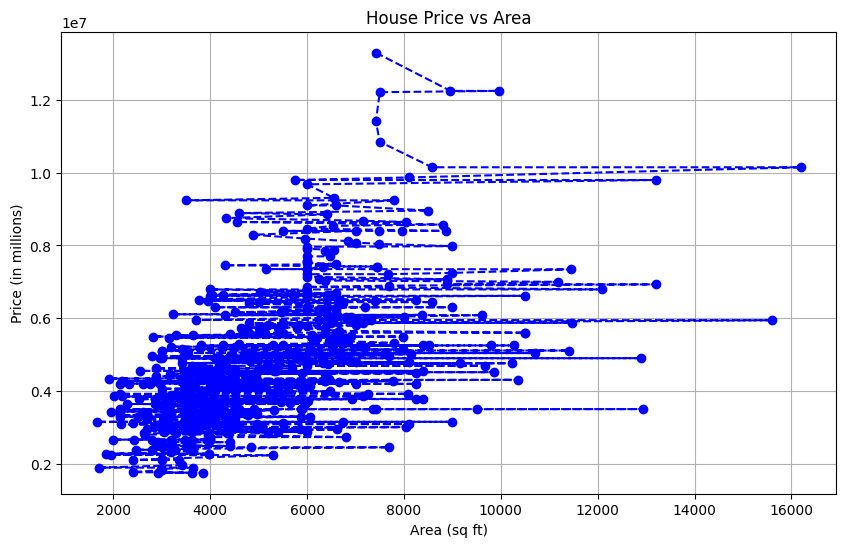

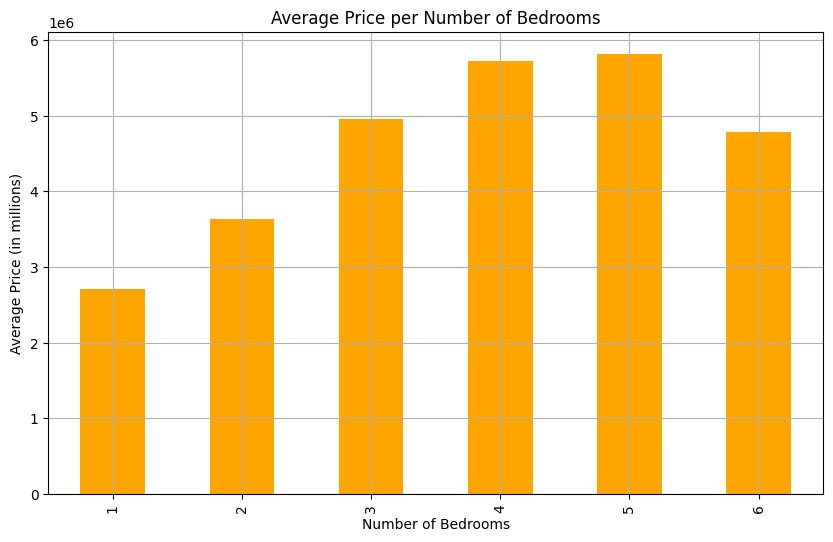

In [16]:
# Line chart: Price vs Area
plt.figure(figsize=(10, 6))
plt.plot(df_cleaned['area'], df_cleaned['price'], color='blue', marker='o', linestyle='dashed')
plt.title('House Price vs Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (in millions)')
plt.grid(True)
plt.show()

# Bar chart: Average Price per Number of Bedrooms
avg_price_per_bedroom = df_cleaned.groupby('bedrooms')['price'].mean()

plt.figure(figsize=(10, 6))
avg_price_per_bedroom.plot(kind='bar', color='orange')
plt.title('Average Price per Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price (in millions)')
plt.grid(True)
plt.show()


- so, the first graph shows that generally, the assumption that prices increase as the area increases is true, with some exceptions (outliers)
- the second graph also shows that another common assumption (more bedrooms equal higher prices) is also true, to an extent, although it seems that there isn't much more benefit that is to be gained after 4 to 5 bedrooms in-terms of the price of the house

### Task 5: Combine all operations into a single Python script and summarize the dataset (view the python file in the CODE FILES directory)

In [10]:
print("In this project, we took a deep dive into a house price dataset to uncover some interesting insights. Starting with an initial exploration, we found that the average house price was around 4.77 million, with house areas typically around 5,150 square feet. Thankfully, there were no missing values, so we could dive straight into analysis without any data cleaning headaches.\n\n")
print("We moved on to some basic math using NumPy, like adding and subtracting house prices and areas. This gave us a sense of how house size relates to price, with larger homes predictably costing more. Standard deviations showed significant variation, suggesting that house pricing isnt just about size  theres a lot more at play.\n\n")

print("For preprocessing, we cleaned up categorical columns by converting them into numbers. Things like \"mainroad\" and \"guestroom\" got translated into 1s and 0s, while \"furnishing status\" was mapped into a scale from unfurnished (0) to fully furnished (2).\n\n")

print("Next came the fun part: visualizations. A line chart of price vs. area showed that while bigger houses generally cost more, there are a lot of outliers. The bar chart revealed that the number of bedrooms significantly affects pricing  houses with 5 or 6 bedrooms tend to be pricier.\n\n")

print("In short, this analysis gave us a better understanding of what drives house prices. Weve prepped this data for predictive modeling, and our visualizations highlight key trends like the price jump for bigger homes and those with more bedrooms. Theres definitely room to dive deeper into these patterns, but we've laid a solid foundation!")

In this project, we took a deep dive into a house price dataset to uncover some interesting insights. Starting with an initial exploration, we found that the average house price was around 4.77 million, with house areas typically around 5,150 square feet. Thankfully, there were no missing values, so we could dive straight into analysis without any data cleaning headaches.


We moved on to some basic math using NumPy, like adding and subtracting house prices and areas. This gave us a sense of how house size relates to price, with larger homes predictably costing more. Standard deviations showed significant variation, suggesting that house pricing isnt just about size  theres a lot more at play.


For preprocessing, we cleaned up categorical columns by converting them into numbers. Things like "mainroad" and "guestroom" got translated into 1s and 0s, while "furnishing status" was mapped into a scale from unfurnished (0) to fully furnished (2).


Next came the fun part: visualizations. A 